In [1]:
import numpy as np
import pandas as pd

pd.options.display.float_format = '{:.2f}'.format

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/reddit-selfposts/rspct.tsv
/kaggle/input/reddit-selfposts/subreddit_info.csv


## Similarity Queries on Pre-Trained Models

In [2]:
import gensim.downloader as api

info_df = pd.DataFrame.from_dict(api.info()['models'], orient='index')
info_df[['file_size', 'base_dataset', 'parameters']].head(5)

,file_size,base_dataset,parameters
fasttext-wiki-news-subwords-300,1005007116.00,"Wikipedia 2017, UMBC webbase corpus and statmt...",{'dimension': 300}
conceptnet-numberbatch-17-06-300,1225497562.00,"ConceptNet, word2vec, GloVe, and OpenSubtitles...",{'dimension': 300}
word2vec-ruscorpora-300,208427381.00,Russian National Corpus (about 250M words),"{'dimension': 300, 'window_size': 10}"
word2vec-google-news-300,1743563840.00,Google News (about 100 billion words),{'dimension': 300}
glove-wiki-gigaword-50,69182535.00,"Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)",{'dimension': 50}


In [3]:
info_df.head(3)

,num_records,file_size,base_dataset,reader_code,license,parameters,description,read_more,checksum,file_name,parts,preprocessing
fasttext-wiki-news-subwords-300,999999.00,1005007116.00,"Wikipedia 2017, UMBC webbase corpus and statmt...",https://github.com/RaRe-Technologies/gensim-da...,https://creativecommons.org/licenses/by-sa/3.0/,{'dimension': 300},1 million word vectors trained on Wikipedia 20...,[https://fasttext.cc/docs/en/english-vectors.h...,de2bb3a20c46ce65c9c131e1ad9a77af,fasttext-wiki-news-subwords-300.gz,1,NaN
conceptnet-numberbatch-17-06-300,1917247.00,1225497562.00,"ConceptNet, word2vec, GloVe, and OpenSubtitles...",https://github.com/RaRe-Technologies/gensim-da...,https://github.com/commonsense/conceptnet-numb...,{'dimension': 300},ConceptNet Numberbatch consists of state-of-th...,[http://aaai.org/ocs/index.php/AAAI/AAAI17/pap...,fd642d457adcd0ea94da0cd21b150847,conceptnet-numberbatch-17-06-300.gz,1,NaN
word2vec-ruscorpora-300,184973.00,208427381.00,Russian National Corpus (about 250M words),https://github.com/RaRe-Technologies/gensim-da...,https://creativecommons.org/licenses/by/4.0/de...,"{'dimension': 300, 'window_size': 10}",Word2vec Continuous Skipgram vectors trained o...,[https://www.academia.edu/24306935/WebVectors_...,9bdebdc8ae6d17d20839dd9b5af10bc4,word2vec-ruscorpora-300.gz,1,The corpus was lemmatized and tagged with Univ...


We will use the glove-wiki-gigaword-50 model. This model with 50-dimensional word vectors is small in size but still quite comprehensive and fully sufficient for our purposes. It was trained on roughly 6 billion lowercased tokens.

In [4]:
model = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


### Similarity Queries

Given a model, the vector for a single word like king can be accessed simply via the property `model.wv['king']` or even more simply by the shortcut `model['king']`. Let’s take a look at the first 10 components of the 50-dimensional vectors for king and queen.

In [5]:
%precision 2

v_king = model['king']
v_queen = model['queen']

print("Vector size:", model.vector_size)
print("v_king  =", v_king[:10])
print("v_queen =", v_queen[:10])
print("similarity:", model.similarity('king', 'queen'))

Vector size: 50
v_king  = [ 0.5   0.69 -0.6  -0.02  0.6  -0.13 -0.09  0.47 -0.62 -0.31]
v_queen = [ 0.38  1.82 -1.26 -0.1   0.36  0.6  -0.18  0.84 -0.06 -0.76]
similarity: 0.7839043


As expected, the values are similar in many dimensions, resulting in a high similarity score of over 0.78. So queen is quite similar to king, but is it the most similar word? Well, let’s check the three words most similar to king with a call to the respective function

In [6]:
%precision 3

model.most_similar('king', topn=3)

[('prince', 0.824), ('queen', 0.784), ('ii', 0.775)]

In fact, the male prince is more similar than queen, but queen is second in the list, followed by the roman numeral II, because many kings have been named “the second.”

In [7]:
v_lion = model['lion']
v_nano = model['nanotechnology']

model.cosine_similarities(v_king, [v_queen, v_lion, v_nano])

array([ 0.784,  0.478, -0.255], dtype=float32)

Based on the training data for the model (Wikipedia and Gigaword), the model assumes the word king to be similar to queen, still a little similar to lion, but not at all similar to nanotechnology. Note, that in contrast to nonnegative TF-IDF vectors, word embeddings can also be negative in some dimensions. Thus, the similarity values range from +1 to −1.

In [8]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.852), ('throne', 0.766), ('prince', 0.759)]

In [9]:
model.most_similar(positive=['paris', 'germany'], negative=['france'], topn=3)

[('berlin', 0.920), ('frankfurt', 0.820), ('vienna', 0.818)]

In [10]:
model.most_similar(positive=['france', 'capital'], topn=1)

[('paris', 0.784)]

In [11]:
model.most_similar(positive=['greece', 'capital'], topn=3)

[('central', 0.797), ('western', 0.757), ('region', 0.750)]

Obviously, there has not been enough training data for the model to derive the relation between Athens and Greece.

Gensim also offers a variant of cosine similarity, `most_similar_cosmul`. This is supposed to work better for analogy queries than the one shown above because it smooths the effects of one large similarity term dominating the equation. For the previous examples, however, the returned words would be the same, but the similarity scores would be higher. ( See the cell below for the same outputs)

In [12]:
model.most_similar_cosmul(positive=['greece', 'capital'], topn=3)

[('central', 0.720), ('western', 0.693), ('region', 0.687)]

If you train embeddings with redacted texts from Wikipedia and news articles, your model will be able to capture factual relations like capital-country quite well. But what about the market research question comparing products of different brands? Usually you won’t find this information on Wikipedia but rather on up-to-date social platforms where people discuss products. If you train embeddings on user comments from a social platform, your model will learn word associations from user discussions. This way, it becomes a representation of what people think about a relationship, independent of whether this is objectively true. This is an interesting side effect you should be aware of. Often you want to capture exactly this application specific bias, and this is what we are going to do next. But be aware that every training corpus contains some bias, which may also lead to unwanted side effects

## Training and Evaluation of Our Own Embeddings

### Data Preparation

In [13]:
posts_df = pd.read_csv("../input/reddit-selfposts/rspct.tsv", sep='\t')
subred_df = pd.read_csv("../input/reddit-selfposts/subreddit_info.csv").set_index(['subreddit'])
df = posts_df.join(subred_df, on='subreddit')
df.head(5)

,id,subreddit,title,selftext,category_1,category_2,category_3,in_data,reason_for_exclusion
0,6d8knd,talesfromtechsupport,Remember your command line switches...,"Hi there, <lb>The usual. Long time lerker, fi...",writing/stories,tech support,NaN,True,NaN
1,58mbft,teenmom,"So what was Matt ""addicted"" to?",Did he ever say what his addiction was or is h...,tv_show,teen mom,NaN,True,NaN
2,8f73s7,Harley,No Club Colors,Funny story. I went to college in Las Vegas. T...,autos,harley davidson,NaN,True,NaN
3,6ti6re,ringdoorbell,"Not door bell, but floodlight mount height.",I know this is a sub for the 'Ring Doorbell' b...,hardware/tools,doorbells,NaN,True,NaN
4,77sxto,intel,Worried about my 8700k small fft/data stress r...,"Prime95 (regardless of version) and OCCT both,...",electronics,cpu,intel,True,NaN


In [14]:
df = df.rename(columns={
    'selftext': 'text',
    'category_1': 'category',
    'category_2': 'subcategory',
})
df.drop(columns=['category_3', 'in_data', 'reason_for_exclusion'], inplace=True)
df.head(5)

,id,subreddit,title,text,category,subcategory
0,6d8knd,talesfromtechsupport,Remember your command line switches...,"Hi there, <lb>The usual. Long time lerker, fi...",writing/stories,tech support
1,58mbft,teenmom,"So what was Matt ""addicted"" to?",Did he ever say what his addiction was or is h...,tv_show,teen mom
2,8f73s7,Harley,No Club Colors,Funny story. I went to college in Las Vegas. T...,autos,harley davidson
3,6ti6re,ringdoorbell,"Not door bell, but floodlight mount height.",I know this is a sub for the 'Ring Doorbell' b...,hardware/tools,doorbells
4,77sxto,intel,Worried about my 8700k small fft/data stress r...,"Prime95 (regardless of version) and OCCT both,...",electronics,cpu


In [15]:
! pip install textacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 3.7 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for floret~=0.10.0 from https://files.pythonhosted.org/packages/16/ee/388a5c76c9292f4bef85d7ef895005bb39a0899f8004e9daceb57b2bb0c9/floret-0.10.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for jellyfish>=0.8.0 from https://files.pythonhosted.org/packages/26/87/8d31224804af9dfa7b34657e083b67b24b322c41dd9464b52218c1a33890/jellyfish-1.0.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.9 MB/s eta 0:00:00


In [16]:
# Limit the data to autos category
df = df[df['category'] == 'autos']
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 2 to 1012979
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           20000 non-null  object
 1   subreddit    20000 non-null  object
 2   title        20000 non-null  object
 3   text         20000 non-null  object
 4   category     20000 non-null  object
 5   subcategory  20000 non-null  object
dtypes: object(6)
memory usage: 22.2 MB


In [17]:
import textacy
import textacy.preprocessing as tprep
from tqdm.autonotebook import tqdm
import re

tqdm.pandas()


def clean(text):
    import html
    
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()


normalize = tprep.make_pipeline(
    tprep.replace.urls,
    tprep.normalize.hyphenated_words,
    tprep.normalize.quotation_marks,
    tprep.normalize.unicode,
    tprep.remove.accents
)

/tmp/ipykernel_42/311698821.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [18]:
df['clean_text'] = df['text'].progress_map(clean)
df['clean_text'] = df['clean_text'].progress_map(normalize)

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

In [19]:
df.rename(columns={'text': 'raw_text', 'clean_text': 'text'}, inplace=True)
df.head()

,id,subreddit,title,raw_text,category,subcategory,text
2,8f73s7,Harley,No Club Colors,Funny story. I went to college in Las Vegas. T...,autos,harley davidson,Funny story. I went to college in Las Vegas. T...
56,5s0q8r,Mustang,Roush vs Shleby GT500,"I am trying to determine which is faster, and ...",autos,ford,"I am trying to determine which is faster, and ..."
78,5z3405,Volkswagen,2001 Golf Wagon looking for some insight,Hello! <lb><lb>Trying to find some information...,autos,VW,Hello! Trying to find some information on repl...
270,7df18v,Lexus,IS 250 Coolant Flush/Change,https://www.cars.com/articles/how-often-should...,autos,lexus,_URL_ I have a IS 250 AWD from 2006. About 73K...
286,5tpve8,volt,Gen1 mpg w/ dead battery?,"Hi, new to this subreddit. I'm considering bu...",autos,chevrolet,"Hi, new to this subreddit. I'm considering buy..."


In [20]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [21]:
def extract_lemmas(text, **kwargs):
    return [
        t.lemma_ for t in textacy.extract.words(
            nlp(text), filter_stops=False, exclude_pos=['PART', 'PUNCT', 'DET', 'PRON', 'SYM', 'SPACE'], **kwargs
        )
    ]

In [22]:
lemmas = df.text.progress_apply(extract_lemmas)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [23]:
sentences = lemmas.progress_apply(lambda t: [i.lower() for i in t])

  0%|          | 0/20000 [00:00<?, ?it/s]

#### Phrases

Especially in English, the meaning of a word may change if the word is part of a compound phrase. Take, for example, timing belt, seat belt, or rust belt. All of these compounds have different meanings, even though all of them can be found in our corpus. So, it may better to treat such compounds as single tokens. We can use any algorithm to detect such phrases, for example, spaCy’s detection of noun chunks. A number of statistical algorithms also exist to identify such collocations, such as extraordinary frequent n-grams. The original Word2Vec paper uses a simple but effective algorithm based on pointwise mutual information (PMI), which basically measures the statistical dependence between the occurrences of two words.

For the model that we are now training, we use an advanced version called normalized pointwise mutual information (NPMI) because it gives more robust results. And given its limited value range from −1 to +1, it is also easier to tune. The NPMI threshold in our initial run is set to a rather low value of 0.3. We choose a hyphen as a delimiter to connect the words in a phrase. This generates compound tokens like harley-davidson. The default underscore
delimiter would result in a different token

In [24]:
from gensim.models.phrases import Phrases, npmi_scorer
import gensim


phrases = Phrases(sentences, min_count=10, threshold=0.4, delimiter="-", scoring=npmi_scorer)

In [25]:
sent = "I had to replace the timing belt in my mercedes c300".split()
phrased = phrases[sent]
print('|'.join(phrased))

I|had|to|replace|the|timing-belt|in|my|mercedes|c300


In [26]:
phrase_df = pd.DataFrame.from_dict(phrases.find_phrases(sentences), orient='index').reset_index()
phrase_df.columns = ['phrase', 'score']
phrase_df = phrase_df[['phrase', 'score']].drop_duplicates() \
        .sort_values(by='score', ascending=False).reset_index(drop=True)

In [27]:
phrase_df[phrase_df['phrase'].str.contains('bmw')].head(3)

,phrase,score
877,bmw-x5,0.52
1085,bmw-335i,0.48
1476,bmw-328i,0.44


In [28]:
phrased_lemmas = sentences.progress_map(lambda s: phrases[s])

  0%|          | 0/20000 [00:00<?, ?it/s]

## Training Models with Gensim

In [29]:
from gensim.models import Word2Vec

model = Word2Vec(sentences,       # tokenized input sentences
                 vector_size=100, # size of word vectors (default 100)
                 window=2,        # context window size (default 5)
                 sg=1,            # use skip-gram (default 0 = CBOW)
                 negative=5,      # number of negative samples (default 5)
                 min_count=5,     # ignore infrequent words (default 5)
                 workers=4,       # number of threads (default 3)
                 epochs=5)         # number of epochs (default 5)

In [30]:
from gensim.models import FastText


model_path = '/kaggle/working'
model_prefix = 'autos'

param_grid = {'w2v': {'variant': ['cbow', 'sg'], 'window': [2, 5, 30]},
              'ft': {'variant': ['sg'], 'window': [5]}}
size = 100

for algo, params in param_grid.items(): 
    print(algo)
    
    for variant in params['variant']:
        sg = 1 if variant == 'sg' else 0
        
        for window in params['window']:
            print(f"  Variant: {variant}, Window: {window}, Size: {size}")
            np.random.seed(1)
            
            if algo == 'w2v':
                model = Word2Vec(sentences, vector_size=size, window=window, sg=sg)
            else:
                model = FastText(sentences, vector_size=size, window=window, sg=sg)

            file_name = f"{model_path}/{model_prefix}_{algo}_{variant}_{window}"
            model.wv.save_word2vec_format(file_name + '.bin', binary=True)

w2v
  Variant: cbow, Window: 2, Size: 100
  Variant: cbow, Window: 5, Size: 100
  Variant: cbow, Window: 30, Size: 100
  Variant: sg, Window: 2, Size: 100
  Variant: sg, Window: 5, Size: 100
  Variant: sg, Window: 30, Size: 100
ft
  Variant: sg, Window: 5, Size: 100


Beware of information loss! When you reload models consisting only of the word vectors, they cannot be trained further. Moreover, FastText models lose the ability to derive embeddings for out-of-vocabulary words

## Evaluating Different Models

Actually, it is quite hard to algorithmically identify the best hyperparameters for a domain-specific task and corpus. Thus, it is not a bad idea to
inspect the models manually and check how they perform to identify some already-known relationships. The saved files containing only the word vectors are small (about 5 MB each), so we can load many of them into memory and run some comparisons.

In [31]:
from gensim.models import KeyedVectors


model_path = '/kaggle/working' 
names = ['autos_w2v_cbow_2', 'autos_w2v_sg_2', 'autos_w2v_sg_5', 'autos_w2v_sg_30', 'autos_ft_sg_5']
models = {}

for name in names:
    file_name = f"{model_path}/{name}.bin"
    print(f"Loading {file_name}")
    models[name] = KeyedVectors.load_word2vec_format(file_name, binary=True)

Loading /kaggle/working/autos_w2v_cbow_2.bin
Loading /kaggle/working/autos_w2v_sg_2.bin
Loading /kaggle/working/autos_w2v_sg_5.bin
Loading /kaggle/working/autos_w2v_sg_30.bin
Loading /kaggle/working/autos_ft_sg_5.bin


In [32]:
def compare_models(models, **kwargs):

    df = pd.DataFrame()
    for name, model in models:
        df[name] = [f"{word} {score:.3f}" for word, score in model.most_similar(**kwargs)]
        
    df.index = df.index + 1
    return df

Now let’s see what effect the parameters have on our computed models. As we are going to analyze the car market, we check out the words most similar to bmw

In [33]:
compare_models([(n, models[n]) for n in names], positive='bmw', topn=10)

,autos_w2v_cbow_2,autos_w2v_sg_2,autos_w2v_sg_5,autos_w2v_sg_30,autos_ft_sg_5
1,lexus 0.854,mercedes 0.781,mercedes 0.775,328i 0.831,bmws 0.840
2,mercedes 0.839,mercede 0.769,benz 0.749,xdrive 0.757,mercedes_benz 0.816
3,mercede 0.834,porsche 0.756,porsche 0.740,128i 0.729,mercedes 0.803
4,porsche 0.831,lexus 0.752,335i 0.727,335i 0.727,mercede 0.782
5,audi 0.829,benz 0.747,328i 0.689,e39 0.719,merc 0.768
6,volvo 0.828,merc 0.743,e39 0.685,550i 0.715,bmwfs 0.768
7,subaru 0.820,volkswagen 0.720,z4 0.682,e60 0.714,mercs 0.761
8,volkswagen 0.790,certified 0.709,m3 0.677,f80 0.711,benz 0.758
9,vw 0.782,vw 0.708,e30 0.671,340i 0.703,m135i 0.739
10,toyota 0.777,135i 0.708,merc 0.671,e46 0.702,328i 0.724


Interestingly, the first models with the small window size of 2 produce mainly other car brands, while the model with window size 30 produces basically lists of different BMW models. In fact, shorter windows emphasize paradigmatic relations, i.e., words that can be substituted for each other in a sentence. In our case, this would be brands as we are searching for words similar to bmw. Larger windows capture more syntagmatic relations, where words are similar if they frequently show up in the same context. Window size 5, which is the default, produced a mix of both except for Fast Text model. For our data, paradigmatic relations are best represented by the CBOW model, while syntagmatic relations require a large window size and are therefore better captured by the skip-gram model. The outputs of the FastText model demonstrate its property that similarly spelled words get similar scores

### Analogy reasoning on our own models

Now let’s find out how our different models are capable of detecting analogous concepts. We want to find out if Toyota has a product comparable to Ford’s F-150 pickup truck. So our question is: What is to “toyota” as “f150” is to “ford”? We use our function compare_models from earlier and transpose the result to compare the results of wv.most_similar() for different models

In [34]:
compare_models([(n, models[n]) for n in names], positive=['f150', 'toyota'], negative=['ford'], topn=5).T

,1,2,3,4,5
autos_w2v_cbow_2,f-150 0.839,acura 0.816,camry 0.814,328i 0.805,v70 0.804
autos_w2v_sg_2,ranger 0.772,f-150 0.770,f-250 0.725,frontier 0.723,crv 0.721
autos_w2v_sg_5,frontier 0.679,tacoma 0.675,f-150 0.667,4runner 0.651,f-250 0.649
autos_w2v_sg_30,4runner 0.714,tacoma 0.707,tacomas 0.681,pathfinder 0.652,4x4 0.638
autos_ft_sg_5,f150s 0.761,toyo 0.752,f-150s 0.750,toyotas 0.750,f-150 0.749


In [35]:
compare_models([(n, models[n]) for n in names], positive=['x3', 'audi'], negative=['bmw'], topn=5).T

,1,2,3,4,5
autos_w2v_cbow_2,b6 0.843,v60 0.841,c250 0.836,t5 0.831,c300 0.831
autos_w2v_sg_2,b8.5 0.747,b8 0.736,avant 0.735,a3 0.732,a7 0.730
autos_w2v_sg_5,a4 0.793,a3 0.783,b8.5 0.779,a5 0.777,sportback 0.759
autos_w2v_sg_30,a4 0.727,q5 0.688,sportback 0.682,a3 0.670,a5 0.665
autos_ft_sg_5,a4 0.738,a3 0.725,b8.5 0.723,a7 0.720,quattro 0.716


In reality, the Toyota Tacoma is a direct competitor to the F-150 as well as the Toyota Tundra. With that in mind, the skip-gram model with the window size 5 gives the best results.

## Visualizing Embeddings

### Applying Dimensionality Reduction

In [36]:
from umap import UMAP

model = models['autos_w2v_sg_30']
words = model.index_to_key # words in vocabulary
wv = [model[word] for word in words]

reducer = UMAP(n_components=2, metric='cosine', n_neighbors=15, min_dist=0.1, random_state=12)
reduced_wv = reducer.fit_transform(wv)

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [37]:
import plotly.express as px


px.defaults.template = "plotly_white"

plot_df = pd.DataFrame.from_records(reduced_wv, columns=['x', 'y'])
plot_df['word'] = words
params = {'hover_data': {c: False for c in plot_df.columns}, 'hover_name': 'word'}
params.update({'width': 800, 'height': 600})

fig = px.scatter(plot_df, x="x", y="y", opacity=0.3, size_max=3, **params)
fig.update_traces(marker={'line': {'width': 0}})
fig.update_xaxes(showticklabels=False, showgrid=True, zeroline=False, visible=True)
fig.update_yaxes(showticklabels=False, showgrid=True, zeroline=False, visible=True)
fig.show()

In [38]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.graph_objs as go


def plot_embeddings(
    model, search=[], topn=0, show_all=False, train_all=False, labels=False, colors=True, n_dims=2, algo='pca', **kwargs
):

    def closest(word, model, search, topn):
        """Find the closest word in a given list of search words, if in top-n."""
        closest_word = model.most_similar_to_given(word, search)
        if word == closest_word or \
           word in [w for w, _ in model.most_similar(closest_word, topn=topn)]:
            return closest_word 
        else:
            return 'other'

    # eliminate kwargs of other methods if supplied
    if algo != 'tsne': 
        kwargs.pop('perplexity', None)
    if algo != 'umap': 
        kwargs.pop('n_neighbors', None)
        kwargs.pop('min_dist', None)
        kwargs.pop('spread', None)

    # define the reducer
    if algo == 'umap':
        reducer = UMAP(n_components=n_dims, metric='cosine', **kwargs)
    elif algo == 'tsne':
        reducer = TSNE(n_components=n_dims, **kwargs)
    else:
        reducer = PCA(n_components=n_dims, **kwargs)

    if len(search) == 0: # no search words: show all
        show_all = True
    if show_all:  # to show all, all must be trained
        train_all = True
        
    # identify words to plot
    if show_all:
        words = [w for w in model.index_to_key]
    else:
        words = search + [sim_word for w in search for sim_word, _ in model.most_similar(w, topn=topn)]
        words = list(set(words)) # make word list it unique for t-SNE

    # reduce
    wv = [model[word] for word in words]
    if not train_all:
        print(f"Calculating {algo} for {len(words)} words ...", end="") 
        reduced_wv = reducer.fit_transform(wv)
    else:
        print(f"Calculating {algo} for {len(words)} words ...", end="") 
        reducer.fit(model.vectors)
        reduced_wv = reducer.transform(wv)
    print(f" done.") ###

    # create data frame for ploty express visualization
    # with x, y (, z) and meta data for styling
    if n_dims == 2:
        df = pd.DataFrame.from_records(reduced_wv, columns=['x', 'y'])
    else:
        df = pd.DataFrame.from_records(reduced_wv, columns=['x', 'y', 'z'])

    df['word']  = words
    params = {}

    if show_all:
        df['size'] = 1
        params.update({'size_max': 3, 'size': 'size' })
    else:
        df['size'] = df['word'].map(lambda w: 30 if w in search else 5)
        params.update({'size': 'size'})

    if len(search) > 0: # colorize with closest search word
        df['label'] = df['word'].map(lambda w: w if labels or w in search else '')
        params.update({'text': 'label'})
        if colors:
            df['color'] = df['word'].apply(closest, model=model, search=search, topn=topn)
            params.update({'color': 'color'})

    params.update({'hover_data': {c: False for c in df.columns}, 'hover_name': 'word'})

    if n_dims == 2:
        params.update({'width': 800, 'height': 400})
        fig = px.scatter(df, x="x", y="y", opacity=0.3, **params)
        fig.update_xaxes(showticklabels=False, showgrid=True, title='', zeroline=False, visible=True)
        fig.update_yaxes(showticklabels=False, showgrid=True, title='', zeroline=False, visible=True)
    else:
        params.update({'width': 900, 'height': 700})
        df['z'] = df['z']*2/3 # scale 3d box
        fig = px.scatter_3d(df, x="x", y="y", z="z", opacity=0.5, **params)
        fig.update_layout(scene = dict(xaxis = go.layout.scene.XAxis(title = '', showticklabels=False),
                                       yaxis = go.layout.scene.YAxis(title = '', showticklabels=False),
                                       zaxis = go.layout.scene.ZAxis(title = '', showticklabels=False)))
        
    fig.update_traces(textposition='middle center', marker={'line': {'width': 0}})
    fig.update_layout(font=dict(family="Franklin Gothic", size=12, color="#000000"))
    fig.show()
    return fig

In [39]:
model = models['autos_w2v_sg_30'] 
search = ['ford', 'lexus', 'vw', 'hyundai', 'goodyear', 'florida', 'navigation']

_ = plot_embeddings(model, search, topn=50, show_all=True, labels=False, algo='umap', n_neighbors=15, min_dist=0.1, random_state=12)

Calculating umap for 9554 words ...

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



 done.


In [40]:
model = models['autos_w2v_sg_30']
search = ['ford', 'bmw', 'toyota', 'tesla', 'audi', 'mercedes', 'hyundai']
_ = plot_embeddings(model, search, topn=10, show_all=False, labels=True, algo='umap', n_neighbors=15, min_dist=10, spread=25, random_state=7)

Calculating umap for 76 words ...

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1393: RuntimeWarning:

divide by zero encountered in power

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



 done.


In [41]:
_ = plot_embeddings(model, search, topn=30, n_dims=3, algo='umap', n_neighbors=15, min_dist=.1, spread=40, random_state=23)

Calculating umap for 211 words ...

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1393: RuntimeWarning:

divide by zero encountered in power

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



 done.


In [42]:
model = models['autos_w2v_sg_5'] 
search = ['ford', 'f150', 'toyota', 'tacoma', 'nissan', 'frontier', 'bmw', 'x5']
_ = plot_embeddings(model, search, topn=0, algo='pca', labels=True, colors=False)

Calculating pca for 8 words ... done.


### Constructing a Similarity Tree

The words with their similarity relations can be interpreted as a network graph in the following way: the words represent the nodes of the graph,
and an edge is created whenever two nodes are “very” similar. The criterion for this could be either that the nodes are among their top-n most-similar neighbors or a threshold for the similarity score. However, most of the words in the vicinity of a word are similar not only to that word but also to each other. Thus, the complete network graph even for a small subset of words would have too many edges for comprehensible visualization

In [43]:
import networkx as nx
from collections import deque
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt


def sim_tree(model, word, top_n, max_dist):

    graph = nx.Graph()
    graph.add_node(word, dist=0)

    to_visit = deque([word])
    while len(to_visit) > 0:
        source = to_visit.popleft() # visit next node
        dist = graph.nodes[source]['dist']+1

        if dist <= max_dist: # discover new nodes
            for target, sim in model.most_similar(source, topn=top_n):
                if target not in graph:
                    to_visit.append(target)
                    graph.add_node(target, dist=dist)
                    graph.add_edge(source, target, sim=sim, dist=dist)
    return graph


def plt_add_margin(pos, x_factor=0.1, y_factor=0.1):
    # rescales the image s.t. all captions fit onto the canvas
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    y_max = max(y_values)
    y_min = min(y_values)

    x_margin = (x_max - x_min) * x_factor
    y_margin = (y_max - y_min) * y_factor
    # return (x_min - x_margin, x_max + x_margin), (y_min - y_margin, y_max + y_margin)

    plt.xlim(x_min - x_margin, x_max + x_margin)
    plt.ylim(y_min - y_margin, y_max + y_margin)

    
def scale_weights(graph, minw=1, maxw=8):
    # rescale similarity to interval [minw, maxw] for display
    sims = [graph[s][t]['sim'] for (s, t) in graph.edges]
    min_sim, max_sim = min(sims), max(sims)

    for source, target in graph.edges:
        sim = graph[source][target]['sim']
        graph[source][target]['sim'] = (sim-min_sim)/(max_sim-min_sim)*(maxw-minw)+minw

    return graph


def solve_graphviz_problems(graph):
    # Graphviz has problems with unicode
    # this is to prevent errors during positioning
    def clean(n):
        n = n.replace(',', '')
        n = n.encode().decode('ascii', errors='ignore')
        n = re.sub(r'[{}\[\]]', '-', n)
        n = re.sub(r'^\-', '', n)
        return n
    
    node_map = {n: clean(n) for n in graph.nodes}
    # remove empty nodes
    for n, m in node_map.items(): 
        if len(m) == 0:
            graph.remove_node(n)
    
    return nx.relabel_nodes(graph, node_map)


def plot_tree(graph, node_size=1000, font_size=12):
    graph = solve_graphviz_problems(graph) ###

    pos = graphviz_layout(graph, prog='twopi', root=list(graph.nodes)[0])
    plt.figure(figsize=(10, 4), dpi=200) ###
    
    plt.box(False) ### hide grid
    plt_add_margin(pos) ### just for layout

    colors = [graph.nodes[n]['dist'] for n in graph] # colorize by distance
    nx.draw_networkx_nodes(graph, pos, node_size=node_size, node_color=colors, 
                           cmap='Set1', alpha=0.4)
    nx.draw_networkx_labels(graph, pos, font_size=font_size)
    scale_weights(graph) ### not in book
    
    for (n1, n2, sim) in graph.edges(data='sim'):
         nx.draw_networkx_edges(graph, pos, [(n1, n2)], width=sim, alpha=0.2)

    plt.show()

/tmp/ipykernel_42/1493432281.py:76: DeprecationWarning:

nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723



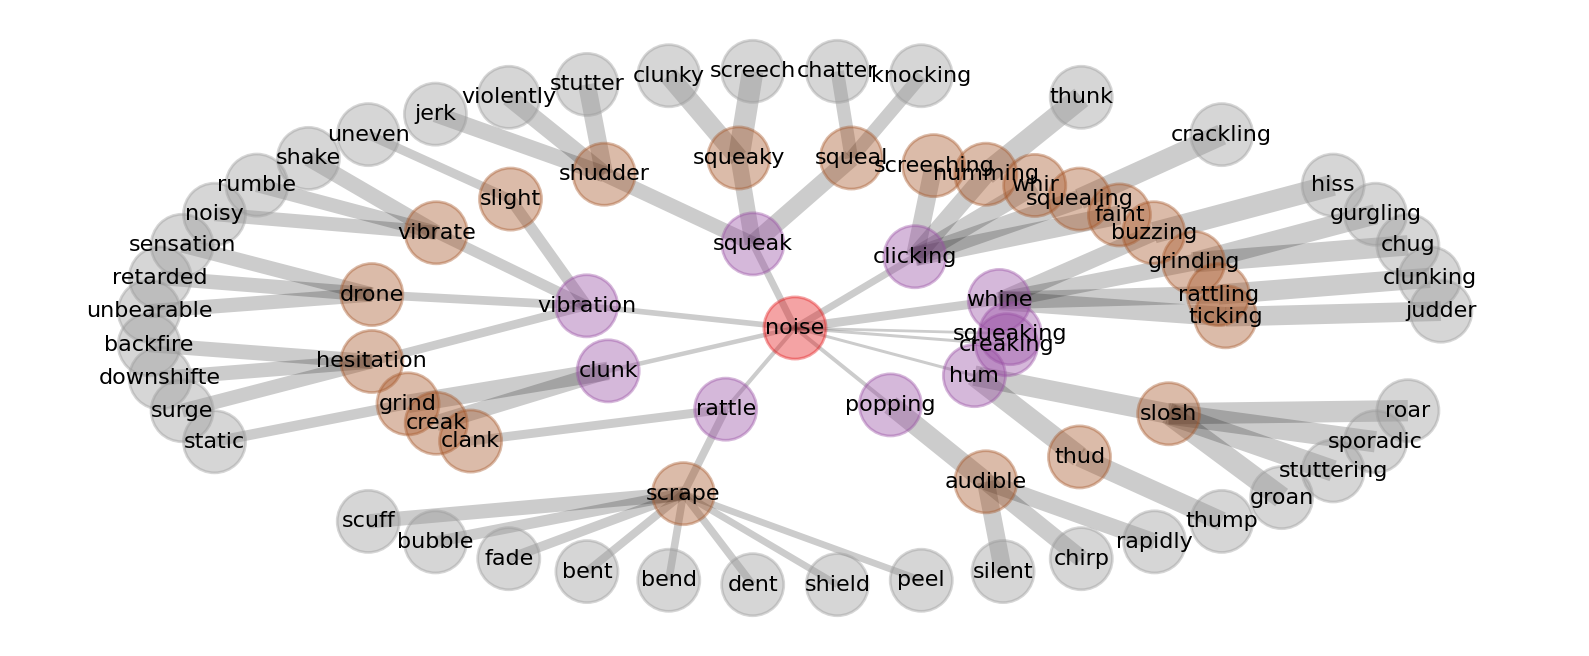

In [44]:
model = models['autos_w2v_sg_2']
graph = sim_tree(model, 'noise', top_n=10, max_dist=3)
plot_tree(graph, node_size=500, font_size=8)

It shows the most similar words to noise and their most similar words up to an imagined distance of 3 to noise. The visualization suggests that we created a kind of a taxonomy, but actually we didn’t. We just chose to include only a subset of the possible edges in our graph to highlight the relationships between a “parent” word and its most similar “child” words. The approach ignores possible edges among siblings or to grandparents. The visual presentation nevertheless helps to explore the specific vocabulary of an application domain around the root word. However, Gensim also implements Poincaré embeddings for learning hierarchical relationships among words

/tmp/ipykernel_42/1493432281.py:76: DeprecationWarning:

nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723



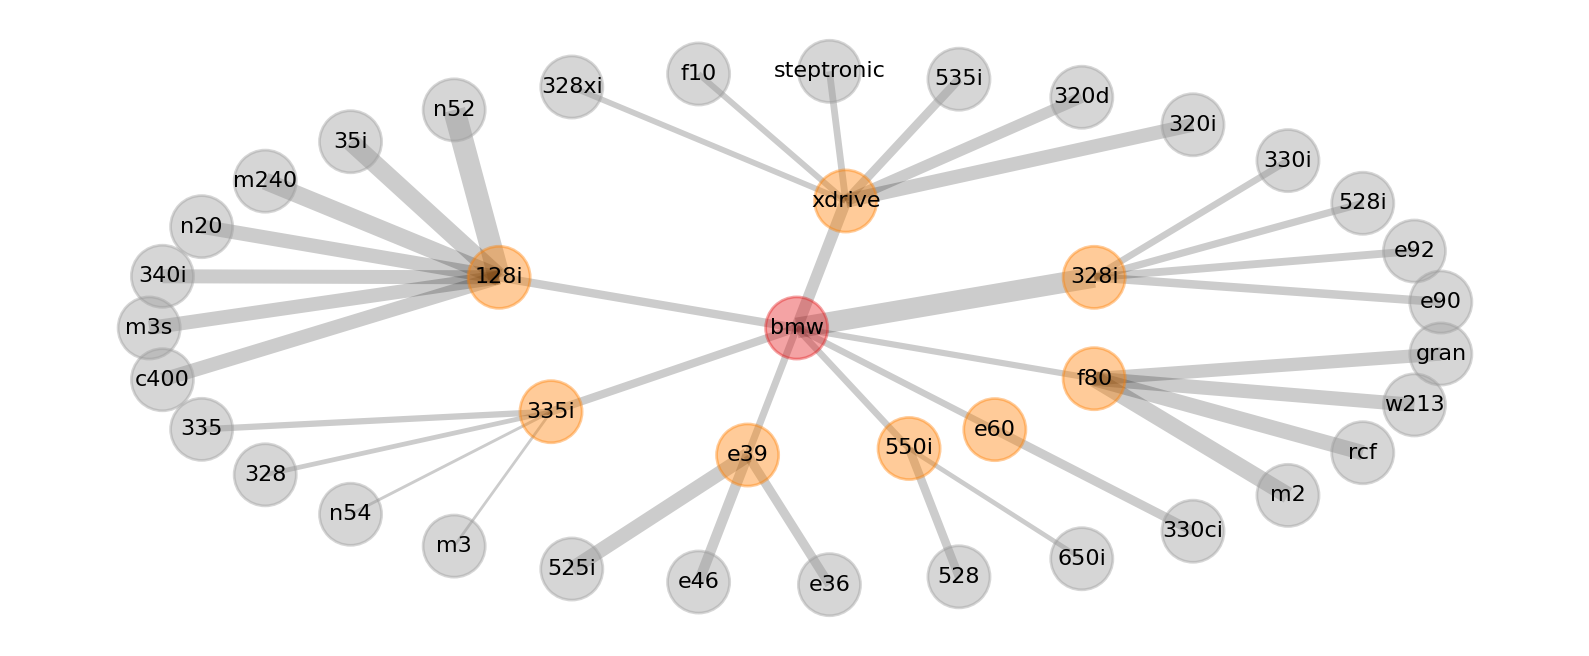

In [45]:
model = models['autos_w2v_sg_30']
graph = sim_tree(model, 'bmw', top_n=8, max_dist=2)
plot_tree(graph, node_size=500, font_size=8)